In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
import keras

/Users/pagidoju/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
#users = pd.read_csv('wine reviews.csv', sep='|', names=u_cols, encoding= 'latin-1')

In [4]:
users = pd.read_csv('wine reviews.csv')

In [5]:
print(users.head)

<bound method NDFrame.head of                         id asins                 brand  \
0     AV13ClKCGV-KLJ3akN68   NaN                 Gallo   
1     AV13CsvW-jtxr-f38AQO   NaN       Fresh Craft Co.   
2     AV13CVI_glJLPUi8O7Po   NaN          1000 Stories   
3     AV13CVI_glJLPUi8O7Po   NaN          1000 Stories   
4     AV13CYL4-jtxr-f37_-t   NaN          Wine Cube153   
5     AV6zq-akYSSHbkXwoEEj   NaN             Beck's Na   
6     AV13CmDIglJLPUi8O7gb   NaN                 Gallo   
7     AV13CmDIglJLPUi8O7gb   NaN                 Gallo   
8     AV6V57uYKZqtpbFMQNh6   NaN      California Roots   
9     AV13CVPUglJLPUi8O7Pw   NaN       Charles Charles   
10    AV13CVPFvKc47QAVnhu7   NaN           Fancy Pants   
11    AV13CVZBglJLPUi8O7P2   NaN         Martini Rossi   
12    AV1mGQHfglJLPUi8JCTw   NaN           603 Brewery   
13    AV1mGQHkGV-KLJ3aeWDD   NaN           603 Brewery   
14    AV1mGQHkGV-KLJ3aeWDD   NaN           603 Brewery   
15    AV13CVcw-jtxr-f37_7d   NaN          

In [6]:
users['log_reviews.rating'] = np.log(users['reviews.rating'].values + 1)

ValueError: max must be larger than min in range parameter.

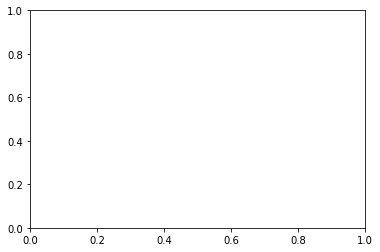

In [9]:
plt.hist(users['log_reviews.rating'].values, bins=50)
plt.xlabel('log(reviews.rating)')
plt.ylabel('Number of Records')
plt.show